In [1]:
import sklearn as skl
import sklearn.model_selection
import sklearn.linear_model
import sklearn.metrics
import sklearn.tree
import sklearn.naive_bayes
from sklearn.preprocessing import StandardScaler
import xgboost as xgb
import pandas as pd 
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics


# from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LinearRegression

from sklearn import model_selection

from sklearn.feature_selection import SelectKBest
# from sklearn.feature_selection import r_regression
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.neighbors import KNeighborsClassifier
import warnings

warnings.filterwarnings("ignore")



#used for suppression of a warning that appears to be generated by the fit(x,y) function
pd.options.mode.chained_assignment = None

plt.rc('figure', max_open_warning = 0)

In [2]:
  
def predictandevaluate(testx, testy, trainx, trainy, model, count):
    test_pred = model.predict(testx)
    train_pred = model.predict(trainx)
    print('    Test set results: ')
    print()
    print_evaluate(testy, test_pred)
    print()
    print('    Train set results')
    print()
    print_evaluate(trainy, train_pred)
    
    columns = ['k-fold','test_MAE', 'test_MSE', 'test_RMSE', 'test_R2 Square',
               'train_MAE', 'train_MSE', 'train_RMSE', 'train_R2 Square']
    results = pd.DataFrame(data=[[count, *evaluate(testy, test_pred) , *evaluate(trainy, train_pred)]], 
                          columns= columns)
    return results
    

In [3]:
def predict(X, Y):
    kfold = skl.model_selection.RepeatedKFold(n_splits=10, n_repeats=1)
    label = 'V-9'
    model = 'linear_regression'
    
    all_predictions=[]
    frames = []
    print(kfold)
    count =1
    for train_mask, test_mask in kfold.split(X,Y):
        train_fold=X.iloc[train_mask]
        test_fold=X.iloc[test_mask]
        trainy = train_fold[label]


        train_fold.drop(columns=label,axis=1,inplace=True)
        trainx= train_fold
        testy = test_fold[label]

        test_fold.drop(columns=label,axis=1,inplace=True)
        testx=test_fold  
        
        model = LinearRegression(normalize=True)

        fit=model.fit(trainx,trainy)


        predictions=model.predict(testx)
        all_predictions.append(predictions)
        predy = pd.DataFrame(fit.predict(testx))
        
        print()
        print('#################### FOR COUNT --', count)
        print('MAE:', skl.metrics.mean_absolute_error(testy, predictions))
        frames.append( predictandevaluate(testx, testy, trainx, trainy, model, count) )
        count+=1 
    results = pd.concat(frames, axis=0)
    
    return all_predictions, results
        

In [4]:
def print_evaluate(true, predicted):  
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    print('        MAE: ', mae)
    print('        MSE: ', mse)
    print('        RMSE: ', rmse)
    print('        R2 Square: ', r2_square)
    
def evaluate(true, predicted):
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    return mae, mse, rmse, r2_square


In [5]:
def generateXY(data):
    sc = StandardScaler()
    X=data.copy()
    Y=X['V-9']
    
    column = data.columns
    for col in column:
        X[col] = pd.DataFrame(sc.fit_transform(X[col].values.reshape(-1,1)))
    
#     Y = X["V-9"]
    return X,Y
        


In [6]:
onlyOnce= True

In [7]:
df = pd.read_excel("Residential-Building-Data-Set.xlsx", index_col=False, header=None, skiprows=1)

In [8]:
df.rename(columns= {'START YEAR': 's_year', 'START QUARTER': 's_quarter', 'COMPLETION YEAR': 'c_year',
                      'COMPLETION QUARTER': 'c_quarter'}, inplace= True)

In [9]:

if onlyOnce:
    df.columns = df.iloc[0]
    df = df.drop(0)
    onlyOnce=False

In [10]:
df = df.reset_index(drop=True)

In [11]:
df

,START YEAR,START QUARTER,COMPLETION YEAR,COMPLETION QUARTER,V-1,V-2,V-3,V-4,V-5,V-6,...,V-22,V-23,V-24,V-25,V-26,V-27,V-28,V-29,V-9,V-10
0,81,1,85,1,1,3150,920,598.5,190,1010.84,...,815.5,1755,8002,60.74,54.26,2978.26,41407,601988.1,2200,410
1,84,1,89,4,1,7600,1140,3040,400,963.81,...,1316.3,8364.78,8393,90.95,89.79,11379.37,44835,929027.1,5000,1000
2,78,1,81,4,1,4800,840,480,100,689.84,...,765.8,1755,4930,38.7,32.04,1653.06,37933,377828.6,1200,170
3,72,2,73,2,1,685,202,13.7,20,459.54,...,152.25,1442.31,1456,9.73,8.34,686.16,8194,122031.7,165,30
4,87,1,90,2,1,3000,800,1230,410,631.91,...,2244.1,9231.76,9286,136.6,140.2,9821,48260,1734973.5,5500,700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
367,83,4,86,1,20,1350,350,108,80,251.37,...,1176.5,8343.6,8382,87.27,85.56,10555.47,33626.25,865878.9,1100,150
368,81,2,82,4,20,600,150,36,60,299.55,...,815.5,1755,8013,62.78,56.45,3387.72,10646.75,606524.2,740,80
369,84,4,86,3,20,1900,430,285,150,364.41,...,1584.3,8776.71,8799,101,101.89,13571.8,34474.5,1067772,860,220
370,82,3,84,4,20,510,160,30.6,60,245.28,...,909.2,7930.66,8004,73.57,69.26,4756.68,21855,669640.3,1100,110


In [12]:
df.describe()

,START YEAR,START QUARTER,COMPLETION YEAR,COMPLETION QUARTER,V-1,V-2,V-3,V-4,V-5,V-6,...,V-22,V-23,V-24,V-25,V-26,V-27,V-28,V-29,V-9,V-10
count,372,372,372,372,372,372.0,372.0,372.0,372,372.00,...,372.0,372.0,372.0,372.0,372.0,372.0,372.0,372.0,372,372
unique,17,4,18,4,20,216.0,105.0,337.0,50,314.00,...,66.0,37.0,67.0,67.0,67.0,67.0,67.0,67.0,117,62
top,86,1,88,4,20,1540.0,250.0,36.0,100,499.25,...,2244.1,1755.0,9286.0,136.6,140.2,9821.0,48260.0,1734973.5,1100,110
freq,41,129,48,106,33,6.0,19.0,3.0,23,4.00,...,19.0,128.0,19.0,19.0,19.0,19.0,19.0,19.0,16,18


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 372 entries, 0 to 371
Columns: 109 entries, START YEAR to V-10
dtypes: object(109)
memory usage: 316.9+ KB


In [14]:
df.isnull().sum().sum()

0

In [15]:
df['V-9'].value_counts()

1100    16
1000    16
1300    15
1500    14
1200    14
        ..
940      1
690      1
5800     1
950      1
510      1
Name: V-9, Length: 117, dtype: int64

In [16]:
for col in df.columns:
    df[col] = df[col].astype('float')

In [17]:
df.dtypes

0
START YEAR            float64
START QUARTER         float64
COMPLETION YEAR       float64
COMPLETION QUARTER    float64
V-1                   float64
                       ...   
V-27                  float64
V-28                  float64
V-29                  float64
V-9                   float64
V-10                  float64
Length: 109, dtype: object

<Figure size 432x288 with 0 Axes>

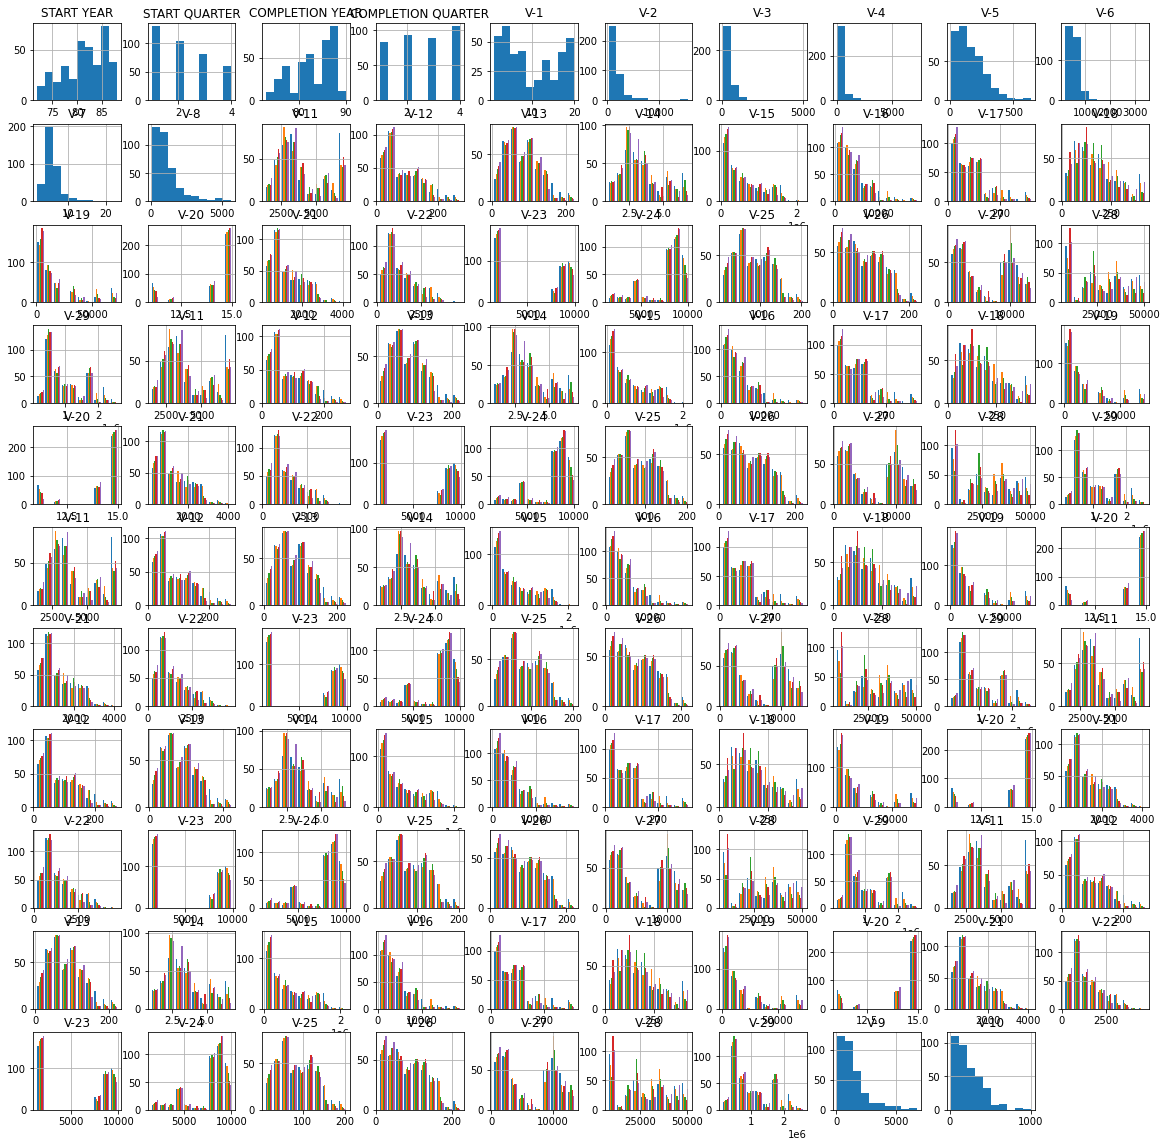

<Figure size 432x288 with 0 Axes>

In [18]:
# histograms

df.hist(figsize=(20,20))
plt.figure()

In [19]:
df.drop_duplicates(inplace=True)

In [20]:
df.shape

(372, 109)

In [21]:
df.drop(columns = ['V-10'], axis = 1, inplace =True)

In [22]:
df.shape

(372, 108)

In [23]:
df.isnull().sum().sum()

0

In [24]:
column= df.columns

In [25]:
column

Index(['START YEAR', 'START QUARTER', 'COMPLETION YEAR', 'COMPLETION QUARTER',
       'V-1', 'V-2', 'V-3', 'V-4', 'V-5', 'V-6',
       ...
       'V-21', 'V-22', 'V-23', 'V-24', 'V-25', 'V-26', 'V-27', 'V-28', 'V-29',
       'V-9'],
      dtype='object', name=0, length=108)

In [26]:
X, Y = generateXY(df)

In [27]:
X

,START YEAR,START QUARTER,COMPLETION YEAR,COMPLETION QUARTER,V-1,V-2,V-3,V-4,V-5,V-6,...,V-21,V-22,V-23,V-24,V-25,V-26,V-27,V-28,V-29,V-9
0,-0.115855,-1.100687,0.485605,-1.413653,-1.331683,0.789443,1.009130,0.480815,0.239049,1.661305,...,0.773046,-0.891142,1.0,-0.577228,1.336151,1.276193,1.245144,1.217384,1.179144,0.674631
1,0.602447,-1.100687,1.433873,1.260308,-1.331683,3.261737,1.458644,4.819050,2.106497,1.490122,...,0.773046,-0.891142,1.0,-0.577228,1.336151,1.276193,1.245144,1.217384,1.179144,2.999323
2,-0.834157,-1.100687,-0.462663,1.260308,-1.331683,1.706136,0.845670,0.270255,-0.561286,0.492910,...,0.773046,-0.891142,1.0,-0.577228,1.336151,1.276193,1.245144,1.217384,1.179144,-0.155616
3,-2.270761,-0.176408,-2.359199,-0.522333,-1.331683,-0.580042,-0.457921,-0.558301,-1.272695,-0.345349,...,0.773046,-0.891142,1.0,-0.577228,1.336151,1.276193,1.245144,1.217384,1.179144,-1.014921
4,1.320749,-1.100687,1.670940,-0.522333,-1.331683,0.706107,0.763941,1.602910,2.195424,0.282053,...,0.773046,-0.891142,1.0,-0.577228,1.336151,1.276193,1.245144,1.217384,1.179144,3.414446
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
367,0.363013,1.672149,0.722672,-1.413653,1.567096,-0.210586,-0.155520,-0.390742,-0.739139,-1.103059,...,0.773046,-0.891142,1.0,-0.577228,1.336151,1.276193,1.245144,1.217384,1.179144,-0.238640
368,-0.115855,-0.176408,-0.225596,1.260308,1.567096,-0.627265,-0.564169,-0.518677,-0.916991,-0.927690,...,0.773046,-0.891142,1.0,-0.577228,1.336151,1.276193,1.245144,1.217384,1.179144,-0.537529
369,0.602447,1.672149,0.722672,0.368987,1.567096,0.094978,0.007940,-0.076235,-0.116656,-0.691609,...,0.773046,-0.891142,1.0,-0.577228,1.336151,1.276193,1.245144,1.217384,1.179144,-0.437899
370,0.123579,0.747871,0.248538,1.260308,1.567096,-0.677267,-0.543737,-0.528272,-0.916991,-1.125225,...,0.773046,-0.891142,1.0,-0.577228,1.336151,1.276193,1.245144,1.217384,1.179144,-0.238640


In [28]:
all_predictions, results = predict(X,Y)

RepeatedKFold(n_repeats=1, n_splits=10, random_state=None)

#################### FOR COUNT -- 1
MAE: 0.5013015497653821
    Test set results: 

        MAE:  0.5013015497653821
        MSE:  0.385435065579155
        RMSE:  0.6208341691459605
        R2 Square:  -0.10588261591030057

    Train set results

        MAE:  0.7408181475071398
        MSE:  1.0699205614011738
        RMSE:  1.0343696444700867
        R2 Square:  -0.00044666664374926057

#################### FOR COUNT -- 2
MAE: 3298534883327.6953
    Test set results: 

        MAE:  3298534883327.6953
        MSE:  1.0880332376529655e+25
        RMSE:  3298534883327.696
        R2 Square:  -6.065242286615755e+24

    Train set results

        MAE:  3298534883328.035
        MSE:  1.0880332376531892e+25
        RMSE:  3298534883328.0347
        R2 Square:  -1.2117501588676578e+25

#################### FOR COUNT -- 3
MAE: 0.6934079297953586
    Test set results: 

        MAE:  0.6934079297953586
        MSE:  0.829308319167

In [29]:
all_predictions[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0.])

In [30]:
results.loc['AVERAGE'] = results.mean()
results.iat[10,0] = float('Nan')
results

,k-fold,test_MAE,test_MSE,test_RMSE,test_R2 Square,train_MAE,train_MSE,train_RMSE,train_R2 Square
0,1.0,5.013015e-01,3.854351e-01,6.208342e-01,-1.058826e-01,7.408181e-01,1.069921e+00,1.034370e+00,-4.466666e-04
0,2.0,3.298535e+12,1.088033e+25,3.298535e+12,-6.065242e+24,3.298535e+12,1.088033e+25,3.298535e+12,-1.211750e+25
0,3.0,6.934079e-01,8.293083e-01,9.106637e-01,-8.042420e-03,7.188855e-01,1.018853e+00,1.009382e+00,-7.922475e-05
0,4.0,6.597070e+12,4.352133e+25,6.597070e+12,-5.875995e+25,6.597070e+12,4.352133e+25,6.597070e+12,-4.231454e+25
0,5.0,1.979121e+13,3.916920e+26,1.979121e+13,-5.727924e+26,1.979121e+13,3.916920e+26,1.979121e+13,-3.795710e+26
0,6.0,4.398047e+12,1.934281e+25,4.398047e+12,-3.601011e+25,4.398047e+12,1.934281e+25,4.398047e+12,-1.841622e+25
0,7.0,4.398047e+12,1.934281e+25,4.398047e+12,-1.973250e+25,4.398047e+12,1.934281e+25,4.398047e+12,-1.930842e+25
0,8.0,6.597070e+12,4.352133e+25,6.597070e+12,-4.948287e+25,6.597070e+12,4.352133e+25,6.597070e+12,-4.311443e+25
0,9.0,4.398047e+12,1.934281e+25,4.398047e+12,-2.668626e+25,4.398047e+12,1.934281e+25,4.398047e+12,-1.880948e+25
0,10.0,8.796093e+12,7.737125e+25,8.796093e+12,-3.734352e+25,8.796093e+12,7.737125e+25,8.796093e+12,-9.013851e+25


# FEATURE SELECTION

In [31]:
# plt.figure();

# In [14]: pd.DataFrame(all_predictions).plot(kind="barh", figsize=(8,8));

def variance_selector(data):
    selector = VarianceThreshold()
    selector.fit(data)
    X_new = data[data.columns[selector.get_support(indices=True)]]
    knn = KNeighborsClassifier(n_neighbors=3)
    selector = SequentialFeatureSelector(knn, n_features_to_select=7)

    selector.fit(X_new, Y)
    
    X_new = data[data.columns[selector.get_support(indices=True)]].drop_duplicates()
    
    X_new = X_new.loc[:,~X_new.columns.duplicated()]
    return X_new

In [32]:


# X_new = SelectKBest(r_regression, k=7).fit_transform(X, Y)

X_new = variance_selector(X)
(X_new.shape)

(372, 7)

In [33]:
X_new

,COMPLETION YEAR,V-2,V-3,V-4,V-5,V-8,V-11
0,0.485605,0.789443,1.009130,0.480815,0.239049,0.112502,0.666482
1,1.433873,3.261737,1.458644,4.819050,2.106497,1.821926,0.666482
2,-0.462663,1.706136,0.845670,0.270255,-0.561286,-0.460658,0.666482
3,-2.359199,-0.580042,-0.457921,-0.558301,-1.272695,-0.953374,0.666482
4,1.670940,0.706107,0.763941,1.602910,2.195424,3.933568,0.666482
...,...,...,...,...,...,...,...
367,0.722672,-0.210586,-0.155520,-0.390742,-0.739139,-0.259549,0.666482
368,-0.225596,-0.627265,-0.564169,-0.518677,-0.916991,-0.520991,0.666482
369,0.722672,0.094978,0.007940,-0.076235,-0.116656,-0.450603,0.666482
370,0.248538,-0.677267,-0.543737,-0.528272,-0.916991,-0.299771,0.666482


In [34]:
Y

0      2200.0
1      5000.0
2      1200.0
3       165.0
4      5500.0
        ...  
367    1100.0
368     740.0
369     860.0
370    1100.0
371     460.0
Name: V-9, Length: 372, dtype: float64

In [35]:
frames = [X_new,Y]
X = pd.concat(frames, axis=1)
X.shape

(372, 8)

In [36]:

all_predictions, results = predict(X,Y)

RepeatedKFold(n_repeats=1, n_splits=10, random_state=None)

#################### FOR COUNT -- 1
MAE: 162.76856669456524
    Test set results: 

        MAE:  162.76856669456524
        MSE:  91794.04324699116
        RMSE:  302.97531788413255
        R2 Square:  0.9519293877450357

    Train set results

        MAE:  133.70705157359328
        MSE:  54730.652174310795
        RMSE:  233.9458317096306
        R2 Square:  0.9608479632336091

#################### FOR COUNT -- 2
MAE: 118.95684410896511
    Test set results: 

        MAE:  118.95684410896511
        MSE:  57720.95338779694
        RMSE:  240.25185407775095
        R2 Square:  0.9463656429078819

    Train set results

        MAE:  137.00642912052936
        MSE:  58675.455997615005
        RMSE:  242.23017152620565
        R2 Square:  0.9606632991902823

#################### FOR COUNT -- 3
MAE: 130.55710811193535
    Test set results: 

        MAE:  130.55710811193535
        MSE:  48296.65825429242
        RMSE:  219.7

In [37]:
results.loc['AVERAGE'] = results.mean()
results.iat[10,0] = float('Nan')
results

,k-fold,test_MAE,test_MSE,test_RMSE,test_R2 Square,train_MAE,train_MSE,train_RMSE,train_R2 Square
0,1.0,162.768567,91794.043247,302.975318,0.951929,133.707052,54730.652174,233.945832,0.960848
0,2.0,118.956844,57720.953388,240.251854,0.946366,137.006429,58675.455998,242.230172,0.960663
0,3.0,130.557108,48296.658254,219.765007,0.963183,138.911306,59707.429074,244.351037,0.959145
0,4.0,132.121993,119660.670255,345.920034,0.908078,131.141633,52857.634158,229.907882,0.963904
0,5.0,128.001904,39602.091693,199.002743,0.976752,135.609364,60644.861890,246.261775,0.957376
0,6.0,138.884990,60020.412053,244.990637,0.970411,136.766187,58366.633390,241.591874,0.957460
0,7.0,143.101749,45761.053089,213.918333,0.949559,135.485182,60097.942056,245.148816,0.960010
0,8.0,143.295064,47110.726532,217.050055,0.953052,137.518296,59679.948628,244.294799,0.960216
0,9.0,148.831544,58653.875437,242.185622,0.948712,136.683079,58635.417310,242.147511,0.960465
0,10.0,173.618635,82727.967463,287.624699,0.952294,134.043268,57262.092347,239.294990,0.959281
